# Customer Churn Analysis
---

## Step 1: Business Understanding
Namibia ventures is trying to increase its profit or revenue margin and customers retention is one key area it is focusing it's resources. As a data analysts of the company we are tasked to build a machine model to predict customer churn.

#### Problem Statement:
Customer attrition is one of the biggest expenditures of any organization. Customer churn otherwise known as customer attrition or customer turnover is the percentage of customers that stopped using your company's product or service within a specified timeframe.

In this project, we aim to find the likelihood of a customer leaving the organization, the key indicators of churn as well as the retention strategies that can be implemented to avert this problem.

#### Objective
In this analysis we will: 
- Identifying trends and patterns in custormer churns.
- Determine Indicators which influences customer churn.
- Build a Machine learning model to classify customers into categories/classes.
- Use the model to predict customer churn.

#### Analytical Questions
1. What are the demographic factors that influence customer churn?
    - Analyze the relationship between demographic variables (Gender, SeniorCitizen, Partner, Dependents) and the churn rate.
2. How does tenure affect customer churn?
    - Investigate the churn rate across different tenure groups to understand if the length of time a customer has been with the company impacts their likelihood of churning.
3. How do contract types and payment methods influence customer churn?
    - Explore how the type of contract (Month-to-Month, One year, Two year) and payment method (Electronic check, Mailed check, Bank transfer, Credit card) affect the likelihood of churn.
4. Which services are most associated with customer churn?
    - Examine the relationship between service usage (PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies) and churn.
5. What is the impact of monthly and total charges on customer churn?
    - Analyze the relationship between financial factors (MonthlyCharges, TotalCharges) and churn to understand if customers who are charged more are more likely to churn.


- Null Hypothesis (H0): There are no significant differences in 
Churn amongst the columns.
- Alternate Hypothesis (H1): There are significant differences in 
Churn amongst the columns.

## Step 2: Data Understanding
The data for this projects has been divided into 3. The first 2 data sets are for training and evaluation the machine learning model  while the last data set is for testing the model.

#### Data Dictionary
The data for this project is in a csv format. The following describes the columns present in the data.

Gender -- Whether the customer is a male or a female

SeniorCitizen -- Whether a customer is a senior citizen or not

Partner -- Whether the customer has a partner or not (Yes, No)

Dependents -- Whether the customer has dependents or not (Yes, No)

Tenure -- Number of months the customer has stayed with the company

Phone Service -- Whether the customer has a phone service or not (Yes, No)

MultipleLines -- Whether the customer has multiple lines or not

InternetService -- Customer's internet service provider (DSL, Fiber Optic, No)

OnlineSecurity -- Whether the customer has online security or not (Yes, No, No Internet)

OnlineBackup -- Whether the customer has online backup or not (Yes, No, No Internet)

DeviceProtection -- Whether the customer has device protection or not (Yes, No, No internet service)

TechSupport -- Whether the customer has tech support or not (Yes, No, No internet)

StreamingTV -- Whether the customer has streaming TV or not (Yes, No, No internet service)

StreamingMovies -- Whether the customer has streaming movies or not (Yes, No, No Internet service)

Contract -- The contract term of the customer (Month-to-Month, One year, Two year)

PaperlessBilling -- Whether the customer has paperless billing or not (Yes, No)

Payment Method -- The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic))

MonthlyCharges -- The amount charged to the customer monthly

TotalCharges -- The total amount charged to the customer

Churn -- Whether the customer churned or not (Yes or No)

### Step 1: Load Data

#### Install Packages and Import libraries

Install pyodbc and python-dotenv if necessary

In [1]:
# %pip install pyodbc  
# %pip install python-dotenv 

Importing the necessary packages 

In [2]:
# Import the pyodbc library to handle ODBC database connections
import pyodbc 

# Import the dotenv function to load environment variables from a .env file
from dotenv import dotenv_values 

# Import the pandas library for data manipulation and analysis
import pandas as pd 

# Import the warnings library to handle warning messages
import warnings

# Filter out (ignore) any warnings that are raised
warnings.filterwarnings('ignore')

# Import the numpy library for data manipulation and analysis
import numpy as np

# Import the seaborn library for data visualization
import seaborn as sns

import matplotlib.pyplot as plt

#### Load 1st Data

Establishing a connection to the SQL database

In [3]:
# # Load environment variables from .env file into a dictionary
# environment_variables = dotenv_values('.env')

# # Get the values for the credentials you set in the .env file
# database = environment_variables.get("DATABASE")
# server = environment_variables.get("SERVER")
# username = environment_variables.get("UID")
# password = environment_variables.get("PWD")

# # Create the connection string using the retrieved credentials
# connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

# print(connection_string)

Load Data

In [4]:
#             #----------Load 2020 data----------
# # Establish a connection to the database using the connection string
# connection = pyodbc.connect(connection_string) 

# # Define the SQL query to select all columns from the specified table
# query = "Select * from LP2_Telco_churn_first_3000"

# # Execute the SQL query and fetch the result into a pandas DataFrame using the established database connection
# data1 = pd.read_sql(query, connection)

# Export data to CSV
# data1.to_csv('data1.csv', index=False)

In [5]:
# Read the exported file
df_1= pd.read_csv(r"C:\Users\Pc\Desktop\Data analysis\Azubi Africa\Career Accelerator\LP2\Customer-churn-analysis\data\data1.csv")

df_1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,NaN,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,NaN,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [6]:
# Find the shape of data
df_1.shape

(3000, 21)

#### Load 2nd Data

In [7]:
# Read 2nd Data from CSV
df_2 = pd.read_csv(r"C:\Users\Pc\Desktop\Data analysis\Azubi Africa\Career Accelerator\LP2\Customer-churn-analysis\data\LP2_Telco-churn-second-2000.csv")

df_2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [8]:
# Find the shape of data
df_2.shape

(2043, 21)

#### Merge to form "train_df"

In [9]:
# Join the "df_1" and "df_2" to form "train"

train_df = pd.concat([df_1, df_2], ignore_index=True)

train_df.shape

(5043, 21)

In [10]:
train_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,NaN,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,NaN,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


#### Load 3nd Data (Test Data)

In [11]:
# Read 3nd Data
df_3 = pd.read_excel(r"C:\Users\Pc\Desktop\Data analysis\Azubi Africa\Career Accelerator\LP2\Customer-churn-analysis\data\Telco-churn-last-2000.xlsx")

df_3.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


In [12]:
# Find shape of file
df_3.shape

(2000, 20)

### Step 2: Read and analyze dataset

In [13]:
# View the train_df data
train_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,NaN,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,NaN,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [14]:
# check for total number of rows and columns
train_df.shape

(5043, 21)

In [15]:
# Check the data info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   object 
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


- Columns are not in their right data types
___

Observe the unique values of the data

In [16]:
# View the number of unique values of each column
train_df.nunique()

customerID          5043
gender                 2
SeniorCitizen          2
Partner                4
Dependents             4
tenure                73
PhoneService           4
MultipleLines          5
InternetService        3
OnlineSecurity         5
OnlineBackup           5
DeviceProtection       5
TechSupport            5
StreamingTV            5
StreamingMovies        5
Contract               3
PaperlessBilling       4
PaymentMethod          4
MonthlyCharges      2069
TotalCharges        4884
Churn                  4
dtype: int64

Investigate the boolean characters in the data

In [17]:
# List the Columns with True/False values
bool_columns = ["SeniorCitizen","Partner","Dependents","PhoneService","MultipleLines","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","PaperlessBilling","Churn"]

# Dictionary to hold unique values for each category
uniques = {}

# Loop through each category and get unique values
for category in bool_columns:
    uniques[category] = train_df[category].unique()

# Display unique values for each category
uniques

{'SeniorCitizen': array([False, True], dtype=object),
 'Partner': array([True, False, 'No', 'Yes'], dtype=object),
 'Dependents': array([False, True, 'No', 'Yes'], dtype=object),
 'PhoneService': array([False, True, 'Yes', 'No'], dtype=object),
 'MultipleLines': array([nan, False, True, 'No', 'No phone service', 'Yes'], dtype=object),
 'OnlineSecurity': array([False, True, nan, 'No', 'Yes', 'No internet service'], dtype=object),
 'OnlineBackup': array([True, False, nan, 'No', 'Yes', 'No internet service'], dtype=object),
 'DeviceProtection': array([False, True, nan, 'No', 'Yes', 'No internet service'], dtype=object),
 'TechSupport': array([False, True, nan, 'Yes', 'No', 'No internet service'], dtype=object),
 'StreamingTV': array([False, True, nan, 'No', 'Yes', 'No internet service'], dtype=object),
 'StreamingMovies': array([False, True, nan, 'No', 'Yes', 'No internet service'], dtype=object),
 'PaperlessBilling': array([True, False, 'Yes', 'No'], dtype=object),
 'Churn': array([False

- There are columns with boolean features having characters that are the same as the boolean characters such as (True, False: Yes, No, No phone service, No internet service)
___

In [18]:
# Check for duplicates
dup_no= train_df.duplicated().sum()

print("Number of duplicates:", dup_no)

Number of duplicates: 0


___

Checking for null values
- There are empty spaces in "TotalCharges" which are being recognized as string, therefore strip the spaces to get the true number of nulls in the column.

In [19]:
# Strip out empty spaces in "TotalCharges" column
train_df["TotalCharges"]= train_df["TotalCharges"].str.strip()

# Check for missing values
train_df.isnull().sum()

customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines        269
InternetService        0
OnlineSecurity       651
OnlineBackup         651
DeviceProtection     651
TechSupport          651
StreamingTV          651
StreamingMovies      651
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges        3000
Churn                  1
dtype: int64

#### Investigate missing values

Missing values in the "OnlineService"

In [20]:
# View the missing values
train_df[train_df["OnlineSecurity"].isna()].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
11,7469-LKBCI,Male,False,False,False,16,True,False,No,NaN,...,NaN,NaN,NaN,NaN,Two year,False,Credit card (automatic),18.950001,NaN,False
16,8191-XWSZG,Female,False,False,False,52,True,False,No,NaN,...,NaN,NaN,NaN,NaN,One year,False,Mailed check,20.650000,NaN,False
21,1680-VDCWW,Male,False,True,False,12,True,False,No,NaN,...,NaN,NaN,NaN,NaN,One year,False,Bank transfer (automatic),19.799999,NaN,False
22,1066-JKSGK,Male,False,False,False,1,True,False,No,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,False,Mailed check,20.150000,NaN,True
33,7310-EGVHZ,Male,False,False,False,1,True,False,No,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,False,Bank transfer (automatic),20.200001,NaN,False


Check its relations to the other columns

In [21]:
# Create a DataFrame containing rows where "OnlineSecurity" is null and drop the "customerID" column
nulls_651 = train_df[train_df["OnlineSecurity"].isna()].drop(columns=["customerID"])

# Create an empty Dictionary
new_unique= {}

# Loop through each category and get unique values
for cols in nulls_651:
    new_unique[cols] = nulls_651[cols].unique()

# Display unique values for each category
new_unique


{'gender': array(['Male', 'Female'], dtype=object),
 'SeniorCitizen': array([False, True], dtype=object),
 'Partner': array([False, True], dtype=object),
 'Dependents': array([False, True], dtype=object),
 'tenure': array([16, 52, 12,  1, 17, 34, 50, 62, 45, 49, 48, 46,  5, 72, 41,  6,  4,
        43, 64, 57, 71,  3, 22, 10, 11, 69, 32, 61, 13, 59, 24, 29, 35,  8,
        63, 70, 47, 33, 19, 23, 20, 40, 44, 36,  2, 15, 55, 60, 65, 66,  7,
        68, 37, 53, 51, 58,  9,  0, 14, 39, 42, 38, 26, 27, 21, 25, 54, 31,
        28, 67, 56, 18, 30], dtype=int64),
 'PhoneService': array([True], dtype=object),
 'MultipleLines': array([False, True], dtype=object),
 'InternetService': array(['No'], dtype=object),
 'OnlineSecurity': array([nan], dtype=object),
 'OnlineBackup': array([nan], dtype=object),
 'DeviceProtection': array([nan], dtype=object),
 'TechSupport': array([nan], dtype=object),
 'StreamingTV': array([nan], dtype=object),
 'StreamingMovies': array([nan], dtype=object),
 'Contract':

- All the 651 nulls have phone service but no internet service, indicating that all services which require internet will not be available for them, hence "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies" will not be available.
_____

Missing values in the "TotalCharges"

In [22]:
# View the necessacary columns
train_df[["tenure","MonthlyCharges","TotalCharges"]]

,tenure,MonthlyCharges,TotalCharges
0,1,29.850000,NaN
1,34,56.950001,NaN
2,2,53.849998,NaN
3,45,42.299999,NaN
4,2,70.699997,NaN
...,...,...,...
5038,24,84.800000,1990.5
5039,72,103.200000,7362.9
5040,11,29.600000,346.45
5041,4,74.400000,306.6


- The missing values in the "TotalCharges" can be imputed by calculating the multiple of "tenure" and the "MonthlyCharge"
___

Missing values in the "MultipleLines"

In [23]:
train_df[train_df["MultipleLines"].isna()].head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,NaN,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,NaN,False
3,7795-CFOCW,Male,False,False,False,45,False,NaN,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,NaN,False
7,6713-OKOMC,Female,False,False,False,10,False,NaN,DSL,True,...,False,False,False,False,Month-to-month,False,Mailed check,29.750000,NaN,False
20,8779-QRDMV,Male,True,False,False,1,False,NaN,DSL,False,...,True,False,False,True,Month-to-month,True,Electronic check,39.650002,NaN,True
27,8665-UTDHZ,Male,False,True,True,1,False,NaN,DSL,False,...,False,False,False,False,Month-to-month,False,Electronic check,30.200001,NaN,True


In [24]:
# Create a DataFrame containing rows where "OnlineSecurity" is null and drop the "customerID" column
nulls_ml = train_df[train_df["MultipleLines"].isna()].drop(columns=["customerID"])

# Create an empty Dictionary
new2_unique= {}

# Loop through each category and get unique values
for cols in nulls_ml:
    new2_unique[cols] = nulls_ml[cols].unique()

# Display unique values for each category
new2_unique

{'gender': array(['Female', 'Male'], dtype=object),
 'SeniorCitizen': array([False, True], dtype=object),
 'Partner': array([True, False], dtype=object),
 'Dependents': array([False, True], dtype=object),
 'tenure': array([ 1, 45, 10, 72, 11, 29, 66,  5, 32, 64, 36, 71, 25, 58,  3, 57, 24,
        67, 31, 14, 68, 69, 28, 23, 21, 27, 42, 33, 26, 60, 70, 48,  0, 22,
        13, 16,  9,  8, 40,  4, 49, 52,  2, 63,  6, 34, 12, 62, 51,  7, 44,
        19, 41, 18, 53, 43, 50, 59, 39, 37, 65, 17, 54, 61, 46, 35],
       dtype=int64),
 'PhoneService': array([False], dtype=object),
 'MultipleLines': array([nan], dtype=object),
 'InternetService': array(['DSL'], dtype=object),
 'OnlineSecurity': array([False, True], dtype=object),
 'OnlineBackup': array([True, False], dtype=object),
 'DeviceProtection': array([False, True], dtype=object),
 'TechSupport': array([False, True], dtype=object),
 'StreamingTV': array([False, True], dtype=object),
 'StreamingMovies': array([False, True], dtype=object),

- Those with missing values in the "MultipleLines" have internet service (DSL) but no phone service, indicating that customers are using only one service.
___

#### In summary, it was noticed that:
- There are columns with boolean features having characters that are the same as the boolean characters. These are= (True, False: Yes, No, No phone service, No internet service)
- All columns with 651 missing values have no internet service, therefore all services/features requiring internet connections are not be available to them.
- The missing values in the "TotalCharges" can be imputed by calculating the multiple of "tenure" and the "MonthlyCharge"
- Those with missing values in the "MultipleLines" have internet service (DSL) but no phone service, indicating that these customers are using only one line of service.
- The single missing value in "Churn" can be removed since the size is insignificant.
- Columns are not in their right data types

### Step 3: Data Cleaning

1. Replace the necessary characters with the right booleans.
2. Fill the missing values in the boolean columns with "False".
3. Impute the missing values in "TotalCharges" with the multiple of "tenure" and "MonthlyCharges" columns
4. Remove missing value in "Churns" column
5. Change the dtypes of the columns


Replace the necessary characters with the right booleans

In [30]:
# Words to replace (using dictionary)
replacements = {"No":False, "No phone service":False, "No internet service":False, "Yes":True}

# Replace stings to boolean values
train_df[bool_columns]= train_df[bool_columns].replace(replacements)

# Loop through each category and get unique values
for category in bool_columns:
    uniques[category] = train_df[category].unique()

# Display unique values for each category
uniques


{'SeniorCitizen': array([False, True], dtype=object),
 'Partner': array([ True, False]),
 'Dependents': array([False,  True]),
 'PhoneService': array([False,  True]),
 'MultipleLines': array([False,  True]),
 'OnlineSecurity': array([False,  True]),
 'OnlineBackup': array([ True, False]),
 'DeviceProtection': array([False,  True]),
 'TechSupport': array([False,  True]),
 'StreamingTV': array([False,  True]),
 'StreamingMovies': array([False,  True]),
 'PaperlessBilling': array([ True, False]),
 'Churn': array([False, True, nan], dtype=object)}

___

Fill the missing values in the boolean columns with "False"

In [25]:
# Check for missing values
train_df.isna().sum()

customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines        269
InternetService        0
OnlineSecurity       651
OnlineBackup         651
DeviceProtection     651
TechSupport          651
StreamingTV          651
StreamingMovies      651
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges        3000
Churn                  1
dtype: int64

In [29]:
# Select and fill the necessary boolean columns with "False" value
sliced_data= train_df.iloc[:,:-3].fillna(False)
sliced_data.isna().sum()

# Update the columns in the original DataFrame with the filled data in sliced_data
train_df.loc[sliced_data.index, sliced_data.columns]= sliced_data
train_df.isna().sum()

customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges        3000
Churn                  1
dtype: int64

___

Impute the missing values in "TotalCharges" with the multiple of "tenure" and "MonthlyCharges" columns

In [32]:
# Calculate TotalCharges for rows with null values in TotalCharges
null_values = train_df[train_df["TotalCharges"].isnull()]
null_values["TotalCharges"] = null_values["tenure"] * null_values["MonthlyCharges"]

# Update the TotalCharges column in the original DataFrame with the calculated values
train_df.loc[null_values.index, "TotalCharges"] = null_values["TotalCharges"]

# Checking for null values
null_2= train_df["TotalCharges"].isna().sum()

print("Nulls in TotalCharges:", null_2)

Nulls in TotalCharges: 0


In [ ]:
# Check for tenures with "0" values
null_values[null_values["TotalCharges"]==0]

- The total charges of newly registered customers is zero because they have not completed their first month of subscription (pending total charge).

___

Remove missing value in "Churns" column

In [34]:
# Removing missing value in "Churns" column
train_df= train_df.dropna(subset=["Churn"])
train_df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Change the dtypes of the columns

In [35]:
# Check the dtypes of the columns
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5042 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5042 non-null   object 
 1   gender            5042 non-null   object 
 2   SeniorCitizen     5042 non-null   object 
 3   Partner           5042 non-null   bool   
 4   Dependents        5042 non-null   bool   
 5   tenure            5042 non-null   int64  
 6   PhoneService      5042 non-null   bool   
 7   MultipleLines     5042 non-null   bool   
 8   InternetService   5042 non-null   object 
 9   OnlineSecurity    5042 non-null   bool   
 10  OnlineBackup      5042 non-null   bool   
 11  DeviceProtection  5042 non-null   bool   
 12  TechSupport       5042 non-null   bool   
 13  StreamingTV       5042 non-null   bool   
 14  StreamingMovies   5042 non-null   bool   
 15  Contract          5042 non-null   object 
 16  PaperlessBilling  5042 non-null   bool   


In [36]:
# Create a list of the categorical columns
categorical_vals=["gender","InternetService","Contract","PaymentMethod"]

#Change the Dtype of the columns
train_df[categorical_vals]= train_df[categorical_vals].astype("category")   # categorical columns

train_df[bool_columns]= train_df[bool_columns].astype(bool)                 # boolean columns

train_df["tenure"]= train_df["tenure"].astype("int64")                      # Integer column

train_df["TotalCharges"]= pd.to_numeric(train_df["TotalCharges"])           # Float column


# Check the dtypes of the columns
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5042 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        5042 non-null   object  
 1   gender            5042 non-null   category
 2   SeniorCitizen     5042 non-null   bool    
 3   Partner           5042 non-null   bool    
 4   Dependents        5042 non-null   bool    
 5   tenure            5042 non-null   int64   
 6   PhoneService      5042 non-null   bool    
 7   MultipleLines     5042 non-null   bool    
 8   InternetService   5042 non-null   category
 9   OnlineSecurity    5042 non-null   bool    
 10  OnlineBackup      5042 non-null   bool    
 11  DeviceProtection  5042 non-null   bool    
 12  TechSupport       5042 non-null   bool    
 13  StreamingTV       5042 non-null   bool    
 14  StreamingMovies   5042 non-null   bool    
 15  Contract          5042 non-null   category
 16  PaperlessBilling  5042 n

### Step 4: Exploratory Data Analysis

Statistic Summary

In [37]:
# Check the statical summary of the numerical features
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,5042.0,32.568822,24.525954,0.0,9.000000,29.000000,56.000000,72.000000
MonthlyCharges,5042.0,65.081376,30.064564,18.4,35.762500,70.550003,90.050002,118.650002
TotalCharges,5039.0,2298.092390,2266.157789,0.0,411.425004,1394.000000,3849.000000,8670.100000


- The average tenure of customers is approximately 32 months (2 and half yrs).
- The tenure ranges from 0 to 72 months, indicating the presence of new customers and customers who've been with the company for 6 years.
- The average monthly charge is approximately $65.
- The average Total charge is $2303.2 while the median is $1398.3, indicating the prescence of outliers.
- Some customers having very high total charges likely due to long tenure and higher monthly expenses.

Visualizations

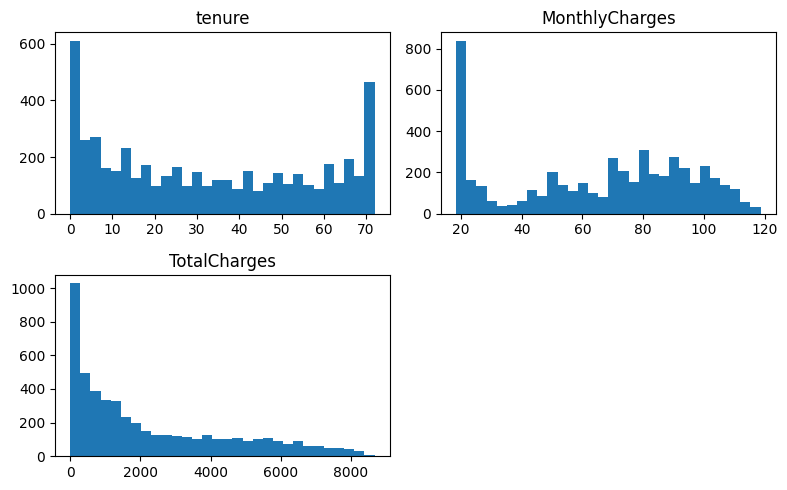

In [39]:
# Generating histograms
train_df.hist(
    figsize=(8, 5),
    bins=30,
    grid= False,
)

plt.tight_layout()
plt.show()